# LLM Foundations
## IndabaX Sudan 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1A4VvPdPNoARnTzpuIoQJpI3nWTbXwOcv?usp=sharing#scrollTo=m2s4kN_QPQVe)

---

**Author:** Asim Mohamed
**Email:** amohamed@aimsammi.org
**Interactive Edition:** Same content with live sliders and interactive controls

---

## Introduction

Large Language Models (LLMs) like ChatGPT and Gemini have revolutionized Natural Language Processing, but understanding how they work under the hood can be challenging. This practical session demystifies the key concepts behind these models, starting with the foundational idea of **Attention** and progressing through the architecture that powers today's most advanced systems.

## What You'll Learn

Throughout this practical, we will cover:

1. **Loading and Interacting with LLMs** — Get hands-on experience with pre-trained models from Hugging Face and learn how to generate text and control output using various parameters

2. **Exploring Real-World Applications** — See how LLMs are used in tasks like code generation, question answering, creative writing, and vision question answering

3. **Transformer Architecture** — Dive into the building blocks of modern LLMs, including the Transformer architecture and its key components like self-attention and multi-head attention

4. **Tokenization and Embeddings** — Learn how text is converted into numerical representations that LLMs can understand, and explore the impact of different tokenization strategies on various languages

---

## Who Is This For?

This practical is suitable for those with **beginner to intermediate** experience in Deep Learning and Natural Language Processing. We recommend having a basic understanding of Linear Algebra.

Let's get started! 🎓

## Topics Covered

**Content:**
- 🤗 Hugging Face Introduction
- Interact with LLMs (with **interactive controls**)
- Tokenization (with **live token counter**)
- Embeddings
- Transformer Architecture
- Attention Mechanism (with **attention visualizer**)

**Level:**
- Beginner
- Intermediate

---

## Learning Objectives

By the end of this practical, you will be able to:

* Understand the idea behind [Attention](https://arxiv.org/abs/1706.03762) and why it is fundamental to modern LLMs
* Describe the building blocks of the [Transformer Architecture](https://arxiv.org/abs/1706.03762) and develop intuition for its design
* Compare tokenizers across different languages
* Use interactive controls to see real-time effects of parameter changes

---

## Prerequisites

Before starting, you should have:

* Basic knowledge of Deep Learning
* Familiarity with Natural Language Processing (NLP) concepts
* Basic understanding of Linear Algebra

## 🛠️ Environment Setup

In [1]:
import sys

required_version = (3, 11)
current_version = sys.version_info[:2]

if current_version != required_version:
    print(f"⚠️ Warning: Expected Python {required_version[0]}.{required_version[1]}, but running {current_version[0]}.{current_version[1]}. Some packages may not work as expected.")
else:
    print(f"✅ Python version {current_version[0]}.{current_version[1]} - Perfect!")

⚠️ Warning: Expected Python 3.11, but running 3.12. Some packages may not work as expected.


In [2]:
# Use 'uv pip install' to leverage uv's parallel download/cache for much faster installs
!pip install uv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 86.7 MB/s eta 0:00:00


In [3]:
from IPython.display import clear_output  # for clearing cell output when done

# Enhanced installation with interactive widgets
!uv pip install  \
    seaborn \
    umap-learn \
    livelossplot \
    accelerate \
    peft \
    nltk \
    datasets \
    ipywidgets \
    ipdb \
    tf-keras \
    transformers

# clear the long install output
clear_output()

In [4]:
#gemma 3 does not work with uv install so it needs to be installed separately
!pip install gemma==3
clear_output()

In [5]:
# Import system and math utilities
import os
import sys
import math
import urllib.request
import requests
from huggingface_hub import hf_hub_download
from PIL import Image
from io import BytesIO
import time


# Check for connected accelerators (GPU or TPU) and set up accordingly
if os.environ.get("COLAB_GPU") and int(os.environ["COLAB_GPU"]) > 0:
    print("A GPU is connected.")
elif "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
    print("A TPU is connected.")
    import jax.tools.colab_tpu
    jax.tools.colab_tpu.setup_tpu()
else:
    print("Only CPU accelerator is connected.")

# Avoid GPU memory allocation to be done by JAX
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = "false"

# Import libraries for JAX-based deep learning
import flax.linen as nn
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import optax

# Import NLP and model-related libraries
import transformers
from transformers import  AutoTokenizer,  AutoModel, AutoModelForCausalLM
from transformers import BlipProcessor, BlipForQuestionAnswering # For image processing.

from gemma import gm

# Import image processing and plotting libraries
from livelossplot import PlotLosses
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns

# Import additional utilities for working with text and models
import torch
import itertools
import random

# Enhanced interactive widgets
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Download an example image to use in the notebook
urllib.request.urlretrieve(
    "https://images.unsplash.com/photo-1529778873920-4da4926a72c2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8Y3V0ZSUyMGNhdHxlbnwwfHwwfHw%3D&w=1000&q=80",
    "cat.png",
)

# Import libraries for NLP preprocessing and working with pre-trained models
from nltk.data import find
import nltk
nltk.download("word2vec_sample")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA

# Set Matplotlib to output SVG format for better quality plots
%config InlineBackend.figure_format = 'svg'

A GPU is connected.


[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Unzipping models/word2vec_sample.zip.


In [6]:
!wget https://raw.githubusercontent.com/asimzz/llm-practicals/main/llm_helpers.py
from llm_helpers import *

--2025-12-11 22:51:52--  https://raw.githubusercontent.com/asimzz/llm-practicals/main/llm_helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18676 (18K) [text/plain]
Saving to: ‘llm_helpers.py’

llm_helpers.py      100%[===================>]  18.24K  --.-KB/s    in 0.001s  

2025-12-11 22:51:52 (14.1 MB/s) - ‘llm_helpers.py’ saved [18676/18676]



In [7]:
print("\n=== Environment Check ===")
print(f"🐍 Python version: {sys.version}")
print(f"🔥 PyTorch version: {torch.__version__}")
print(f"🤗 Transformers version: {transformers.__version__}")
print(f"💻 CUDA available: {torch.cuda.is_available()}")
print("🎛️ Interactive widgets enabled!")
print("✅ Setup complete!")


=== Environment Check ===
🐍 Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
🔥 PyTorch version: 2.9.0+cu126
🤗 Transformers version: 4.57.3
💻 CUDA available: True
🎛️ Interactive widgets enabled!
✅ Setup complete!


## 🤖 Load a Model from Hugging Face and Interact Locally
<!-- (10 mins)-->

### 🎯 Objective

- Learn how to **load a model from Hugging Face** and run **inference** using an LLM  
- Load a lightweight model (e.g. `gpt-neo-125m`) and **prompt** it with a simple question
- **Experiment with different generation parameters using interactive controls**

📚 Welcome to the World of Large Language Models!
We're thrilled to have you on board! 🎉 Before we dive into the hands-on part of our journey, let's take a quick detour into the fascinating world of [Hugging Face](https://huggingface.co/)—an incredible open-source platform for building and deploying cutting-edge language models.

##### 🧠 **What are Large Language Models?**

Large Language Models (LLMs) are AI systems trained on vast amounts of text data to understand and generate human-like text. They work by learning patterns in language and predicting the most likely next word given some context.

**Key concepts:**

*   Pattern Recognition: LLMs analyze billions of words to understand language
*   Next-Word Prediction: At their core, they guess the most probable next word
*   Context Understanding: They consider the entire input when making predictions

#### **About HuggingFace**

<img src="https://www.hugging-face.org/wp-content/uploads/2023/11/hugging-faces.png" alt="Alt Text" width="500">

**HuggingFace** is the "GitHub of AI" - a platform that democratizes access to cutting-edge AI models. Founded in 2016, they provide:

* [Model Hub](https://huggingface.co/models): Thousands of pre-trained models ready to use  
* [Transformers Library](https://huggingface.co/docs/transformers): Easy-to-use tools for working with language models  
* [Datasets](https://huggingface.co/datasets): Curated datasets for training and evaluation  
* [Spaces](https://huggingface.co/spaces): Platform for hosting ML demos and applications  

In this Colab we print prompts in <span style="color:green;"><b>green</b></span> and samples generated from a model in <span style="color:purple;"><b>purple</b></span> like in the example below:

In [8]:
print_sample(prompt='My fake prompt', sample=' is awesome!')

##### **Your First Language Model**

Let's dive into how simple it is to load and interact with a model from **Hugging Face**! 🤗

For this tutorial, we've pre-configured multiple model options for you to experiment with:

* **EleutherAI/gpt-neo-125M** - A lightweight model with 125 million parameters. It's fast and memory-efficient—great for getting started!
* **gpt2** and **gpt2-medium** - Classic models trained by OpenAI, with 117M and 355M parameters respectively. The medium variant offers more fluency and coherence.
* **tiiuae/falcon-rw-1b** - A larger open-source model from the Falcon family, with 1 billion parameters.
* **microsoft/phi-4** - A cutting-edge model by Microsoft focused on high-quality language generation with smaller memory footprint.

You can switch between these models by restarting the Colab kernel and updating the `model_name` variable in the cell below.

> 💡 **Note:** The loading and interaction steps shown here apply to **any** Hugging Face model that supports text generation via the `pipeline` API. Feel free to explore beyond this list!

Note: The model `microsoft/phi-4` might take over half an hour to load all required files. We recommend sticking to other models during this practical and playing around with Phi-4 later on in your own time.
Let's generate some text:

In [9]:
# @title 🎛️ Interactive Text Generation

# Set the model name
model_name = 'gpt2'  # @param ['EleutherAI/gpt-neo-125M', 'gpt2', 'gpt2-medium', 'Qwen/Qwen3-0.6B', 'tiiuae/falcon-rw-1b','microsoft/phi-4']

# Define the prompt for the text generation model.
test_prompt = 'Once upon a time in a magical Khartoum'  # @param {type: 'string'}

# Interactive parameters
temperature = 0.8  # @param {type:"slider", min:0.1, max:1.5, step:0.1}
max_length = 80  # @param {type:"slider", min:30, max:200, step:10}
top_p = 0.9  # @param {type:"slider", min:0.1, max:1.0, step:0.05}
num_samples = 3  # @param {type:"slider", min:1, max:5, step:1}

def interactive_text_generation(model_name, prompt, temp, max_len, top_p_val, num_gen):
    """Enhanced text generation with real-time parameter control"""

    print(f"🤖 Loading {model_name}...")

    # Create a text generation pipeline using the specified model.
    generator = transformers.pipeline('text-generation', model=model_name)

    clear_output(wait=True)  # Clear loading messages

    print(f"🎛️ Generation Parameters:")
    print(f"   Temperature: {temp} | Top-p: {top_p_val} | Max length: {max_len}")
    print(f"   Generating {num_gen} samples...\n")

    # Generate multiple samples
    for i in range(num_gen):
        start_time = time.time()

        # Generate text with interactive parameters
        model_output = generator(
            prompt,
            do_sample=True,
            temperature=temp,
            max_new_tokens=max_len,
            top_p=top_p_val,
            num_return_sequences=1,
            truncation=True,
            pad_token_id=generator.tokenizer.eos_token_id
        )

        generation_time = time.time() - start_time

        # Print each sample with timing info
        print(f"🎲 Sample {i+1}:")
        print_sample(prompt, model_output[0]['generated_text'], model_name=model_name, generation_time=generation_time)
        print()

# Run the interactive generation
interactive_text_generation(model_name, test_prompt, temperature, max_length, top_p, num_samples)

🎛️ Generation Parameters:
   Temperature: 0.8 | Top-p: 0.9 | Max length: 80
   Generating 3 samples...

🎲 Sample 1:



🎲 Sample 2:



🎲 Sample 3:


***💡Tip:*** Try running the code above with different prompts or with the same prompt more than once! Adjust the sliders to see real-time effects!

***🤔 Discussion:*** Why do you think the generated text changes every time, even with the same prompt? Write your response in the input field below and discuss with your neighbour.

<details>
<summary><strong>Answer</strong></summary>

The model uses sampling with randomness (temperature > 0) to generate diverse outputs.  
Even with the same input, the probabilistic nature of text generation leads to different results.

</details>

### Temperature in Language Models — Mathematical Background

Language models output **logits** (unnormalized scores):

$$
z = (z_1, z_2, \dots, z_V),
$$

which are converted into probabilities using the softmax function.  
Temperature $T$ modifies this softmax:

$$
P_i = \frac{\exp(\frac{z_i}{T})}{\sum_{j=1}^{V} \exp(\frac{z_i}{T})}.
$$

#### What Temperature Does

- **Low $T < 1$**  
  - Sharpens the distribution  
  - High-probability tokens dominate  
  - Output becomes deterministic and repetitive  

- **$T = 1$**  
  - Balanced behavior  
  - Follows the model’s natural distribution  

- **High $T > 1$**  
  - Flattens the distribution  
  - Rare tokens become more likely  
  - Output becomes more creative but less stable  

👉 **In short:** Temperature controls the *entropy* (randomness) of token selection:

- **Low (0.1–0.5):** Conservative, predictable outputs  
- **Medium (0.6–1.0):** Balanced creativity and coherence  
- **High (1.1–2.0):** Very creative but potentially

---

#### Tasks: Explore Temperature Using These Numeric Examples

Assume the model outputs the logits:

$$
z = [5.0,\ 3.0,\ 1.0]
$$

Using the softmax formula:

$$
P_i = \frac{\exp(\frac{z_i}{T})}{\sum \exp(\frac{z_j}{T})},
$$

🔹 **Task 1 — Compute probabilities at $T = 1$**
- Convert logits to probabilities using standard softmax.
- Observe which token becomes dominant.

🔹 **Task 2 — Compute probabilities at $T = 0.5$**
- Divide logits by 0.5 (i.e., multiply by 2).
- Compare how much sharper the distribution becomes.

🔹 **Task 3 — Compute probabilities at $T = 1.5$**
- Divide logits by 1.5.
- Observe how probabilities flatten and allow more diversity.

🔹 **Task 4 — Predict behavior as $T \to \infty$.**
- What happens when all logits approach zero?
- Why does the distribution become uniform?

These exercises will help you visualize how temperature reshapes the probability distribution used during text generation.

---

### 📌 Top-p (Nucleus Sampling)
Top-p selects the **smallest set of tokens** whose cumulative probability ≥ p.  
Lower p → fewer token options (focused).  
Higher p → more options (diverse).

👉 **Bonus Task:** Read about top-p and compare how it differs from temperature.


#### **Understanding Generation Parameters**

Generation parameters control how the model produces text. Let's explore the most important ones:

### Temperature  
Controls the randomness of predictions:

- **Low (0.1–0.5):** Conservative, predictable outputs  
- **Medium (0.6–1.0):** Balanced creativity and coherence  
- **High (1.1–2.0):** Very creative but potentially incoherent  

### Top-p (Nucleus Sampling)  
Controls diversity by limiting the vocabulary considered:

- **Low (0.1–0.3):** Very focused on most likely words  
- **High (0.8–1.0):** Considers more word possibilities  


Let's experiment with these parameters:

In [10]:
# @title 🎯 Parameter Comparison Tool
model_name = "gpt2-medium"  # @param ["gpt2", "gpt2-medium", "EleutherAI/gpt-neo-125M"]
prompt = "Once upon a time in a magical Khartoum,"  # @param {type:"string"}

# Compare different temperature settings
temp_low = 0.3  # @param {type:"slider", min:0.1, max:1.0, step:0.1}
temp_high = 1.2  # @param {type:"slider", min:0.8, max:1.5, step:0.1}
max_new_tokens = 50  # @param {type:"slider", min:20, max:100, step:10}

def compare_temperatures(model_name, prompt, low_temp, high_temp, max_tokens):
    """Compare outputs at different temperature settings"""

    print(f"🔄 Loading {model_name} for temperature comparison...")

    # Load model components
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
    model = transformers.AutoModelForCausalLM.from_pretrained(model_name)

    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    clear_output(wait=True)

    print(f"🎛️ Comparing Temperature Settings")
    print(f"📝 Prompt: \"{prompt}\"\n")

    temperatures = [low_temp, high_temp]
    labels = ["Conservative", "Creative"]

    for temp, label in zip(temperatures, labels):
        print(f"🌡️ {label} (Temperature = {temp})")

        # Tokenize input
        inputs = tokenizer(prompt, return_tensors="pt")

        # Generate with current temperature
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=max_tokens,
                temperature=temp,
                do_sample=True,
                top_p=0.9,
                pad_token_id=tokenizer.eos_token_id
            )

        # Decode and display
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print_sample(prompt, generated_text, model_name=f"{model_name} (T={temp})")
        print()

# Run temperature comparison
compare_temperatures(model_name, prompt, temp_low, temp_high, max_new_tokens)

🎛️ Comparing Temperature Settings
📝 Prompt: "Once upon a time in a magical Khartoum,"

🌡️ Conservative (Temperature = 0.3)



🌡️ Creative (Temperature = 1.2)


**🎯 Try This:** Experiment with different prompts and temperature values. What patterns do you notice?

#### **Language Models in Real-World Applications**

Language models have many practical applications. Let's explore a few:

**Code Generation**

In [11]:
# @title 💻 Interactive Code Generation
code_prompt = 'Write a Python function that calculates the fibonacci sequence:' # @param {type:'string'}
model_name = 'gpt2'  # @param ['gpt2', 'gpt2-medium', 'EleutherAI/gpt-neo-125M']
code_temperature = 0.3 # @param {type:"slider", min:0.1, max:1.0, step:0.1}
code_max_tokens = 150 # @param {type:"slider", min:50, max:250, step:25}

# Generate code with interactive parameters
generator = transformers.pipeline('text-generation', model=model_name)
code_result = generator(
    code_prompt,
    do_sample=True,
    temperature=code_temperature,
    max_new_tokens=len(code_prompt.split()) + code_max_tokens,
    top_p=0.9,
    truncation=True,
    pad_token_id=generator.tokenizer.eos_token_id
)

print('💻 Code Generation:')
print_sample(code_prompt, code_result[0]['generated_text'], model_name=model_name)

Device set to use cuda:0


💻 Code Generation:


**Question Answering**

In [12]:
# @title ❓ Interactive Q&A
qa_prompt = 'What are the main advantages of using version control in software development?' # @param {type:'string'}
model_name = 'gpt2'  # @param ['gpt2', 'gpt2-medium', 'EleutherAI/gpt-neo-125M']
qa_temperature = 0.5 # @param {type:"slider", min:0.1, max:1.0, step:0.1}
qa_max_tokens = 100 # @param {type:"slider", min:30, max:150, step:10}

generator = transformers.pipeline('text-generation', model=model_name)
qa_result = generator(
    qa_prompt,
    do_sample=True,
    temperature=qa_temperature,
    max_new_tokens=len(qa_prompt.split()) + qa_max_tokens,
    top_p=0.9,
    truncation=True,
    pad_token_id=generator.tokenizer.eos_token_id
)

print_sample(qa_prompt, qa_result[0]['generated_text'], model_name=model_name)

Device set to use cuda:0


**Creative Writing**

In [13]:
# @title 📝 Interactive Creative Writing
story_prompt = 'Write the opening paragraph of a science fiction story:' # @param {type:'string'}
model_name = 'EleutherAI/gpt-neo-125M'  # @param ['gpt2', 'gpt2-medium', 'EleutherAI/gpt-neo-125M']
story_temperature = 0.9 # @param {type:"slider", min:0.1, max:1.5, step:0.1}
story_max_tokens = 120 # @param {type:"slider", min:50, max:200, step:10}

generator = transformers.pipeline('text-generation', model=model_name)
story_result = generator(
    story_prompt,
    do_sample=True,
    temperature=story_temperature,
    max_new_tokens=len(story_prompt.split()) + story_max_tokens,
    top_p=0.9,
    truncation=True,
    pad_token_id=generator.tokenizer.eos_token_id
)

print_sample(story_prompt, story_result[0]['generated_text'], model_name=model_name)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

Device set to use cuda:0


## 🔍 Transformer Architecture Quick Recap [<font color='orange'>Beginner</font>]

<!-- (5 mins)-->



The Transformer Architecture was famously introduced in the paper entitled [Attention is all you need](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf) by Vaswani et al. As the title of the paper suggests, such an architecture consists of basically only attention mechanisms along with feed-forward layers and linear layers, as shown in the diagram below.

<img src="https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png" width="350" />

Transformers and its variations are in the core of Large Language Models and it's not an exaggeration to say that almost all language models out there are Transformer based architectures. As you can see in the diagram the original Transformer architecture consists of two parts, one that receives inputs usually called encoder and another that receives outputs (i.e. targets) called decoder. This is because the transformer was designed for machine translation.

In this practical, we will focus only on the decoder part which is the architecture that powers most modern large language models like ChatGPT.

### Transformer Decoder Overview

<img src="https://substackcdn.com/image/fetch/$s_!qbpc!,f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Ff6133c18-bfaf-4578-8c5a-e5ac7809f65b_1632x784.png" width="650" height="400" />


- **Input Preparation**  
  - Raw text → **Tokenizer** → sequence of token IDs  
  - IDs → **Token Embeddings** + **Positional Embeddings** → input vectors  

- **Stacked Decoder Blocks** (repeated _N_ times)  
  1. **Layer Norm**  
  2. **Masked Multi-Head Self-Attention** (causal mask)  
     - Residual connection adds attention output back to its input  
  3. **Layer Norm**  
  4. **Feed-Forward Network** (MLP)  
     - Two linear layers + nonlinearity, applied position-wise  
     - Residual connection adds FFN output back to its input  

- **Output Projection**  
  - Final decoder vectors → linear layer → vocabulary logits → softmax for next-token probabilities  

Let's begin our journey by understanding how models tokenize text.

## 🧱 Tokenization [<font color='orange'>Beginner</font>]

<!--(10 minutes)-->


Natural language models operate on discrete numerical inputs, but raw text is a sequence of characters. **Tokenization** is the bridge between human-readable text and model-ready input vectors. At a high level, tokenization:

1. **Splits text into units (“tokens”)**  
   - Breaks a string of characters into words, subwords, or characters.  
2. **Maps each token to an integer ID**  
   - Uses a fixed vocabulary so that every token corresponds to a unique index.  
3. **Enables batch processing and embedding lookup**  
   - Converts variable-length text into padded sequences of IDs that can be processed by neural networks.



A token can be:

* A single character (`i`, `n`, `d`, `a`, `b`)
* A subword (`ind`, `aba`)
* A whole word (`indaba`)

A vocabulary is the fixed list of tokens (words, subwords, or characters) that a model knows, each mapped to a unique integer ID for embedding lookup.

Different models—like GPT, Gemma, LLaMA, Mistral, and others—use different tokenizers, and each makes its own decisions about how to break text into tokens. The most common tokenization method used in LLMs is **Byte Pair Encoding (BPE)**. If you’re curious about how it works, this [excellent video](https://www.youtube.com/watch?v=zduSFxRajkE) explains really well.

> The key idea behind tokenization is **granularity**—how small should a model break text down in order to understand and predict what comes next? The goal is to find a balance: break text into small enough pieces that the model can generalize well, but not so small that it explodes the number of tokens. A good tokenizer keeps the vocabulary compact, handles diverse languages efficiently, and compresses text well so that fewer tokens are needed to represent meaning—especially across multilingual inputs.

Vocabulary size is the number of distinct tokens (words, subwords, or symbols) that a model’s tokenizer recognizes

### **🎯 Try it Yourself:** Tokenizer Playground

Let's make this real. Visit any of these:

* [Tiktokenizer Playground (GPT-2)](https://tiktokenizer.vercel.app/?model=gpt2)
* [OpenAI Tokenizer](https://platform.openai.com/tokenizer)

Paste the sentence:
`Welcome to the IndabaX Sudan LLM foundations tutorial. Get ready to explore the world of LLMs.`

<!-- 🎯 Now try the same sentence in another language you speak—Yorùbá, Kiswahili, French, etc. Write down what you noticed. -->


<figure>
  <img src="https://drive.google.com/uc?export=view&id=1XpIVAOk281R7i13IMYQHe0HZZG6tUrjw" alt="TikTokenizer" width="800"/>
  <figcaption><em></em></figcaption>
</figure>

### Play around with Gemma Tokenizer

In [15]:
tokenizer = gm.text.Gemma3Tokenizer()
tokenized_prompt = tokenizer.encode('Glad to be at the IndabaX Sudan!', add_bos=True)
tokenized_prompt

[<_Gemma3SpecialTokens.BOS: 2>,
 122637,
 531,
 577,
 657,
 506,
 1851,
 6525,
 236917,
 48131,
 236888]

In [16]:
tokenizer.decode(tokenized_prompt[1:])

'Glad to be at the IndabaX Sudan!'

In [17]:
#Let's tokenize a different language
arabic_tokens=tokenizer.encode('إنه يوم جميل اليوم')
arabic_tokens

[237480, 18575, 42782, 182605, 23075]

In [18]:
print('Arabic prompt got tokenized into the following tokens: \n',
      tokenizer.decode(arabic_tokens[0]), "\n",
        tokenizer.decode(arabic_tokens[1]),  "\n",
        tokenizer.decode(arabic_tokens[2]),  "\n",
        tokenizer.decode(arabic_tokens[3]),  "\n",
        tokenizer.decode(arabic_tokens[4]),  "\n",

      )

Arabic prompt got tokenized into the following tokens: 
 إ 
 نه 
  يوم 
  جميل 
  اليوم 



**Exercise:** What is the vocabulary size of the Gemma3 Tokenizer?

## 𓊳 Embeddings [<font color='orange'>Beginner</font>]

<!-- (10 mins)-->

After tokenization, each token ID is mapped to a dense vector via the **embedding layer**. These embeddings capture semantic information about tokens and serve as the input to the rest of the model.

**Token Embeddings**  
  A learned lookup table of shape `(vocab_size × d_model)`. Each token ID becomes a `d_model`-dimensional vector.



<figure>
  <img src="https://drive.google.com/uc?export=view&id=1mReprFfL9ezlIRh55Co0yzX3EjiwcHsf" alt="Positional Encoding Vectors" width="800"/>
  <figcaption><em></em></figcaption>
</figure>


In this section, we’ll pull the learned token embeddings directly from Word2Vec model for a small set of example words, then use principal component analysis (PCA) to project those high-dimensional vectors into two dimensions (2D). Finally, we'll plot the 2D coordinates to see how semantically related tokens naturally cluster in the embedding space.

PCA (Principle Component Analysis) is a  dimensionality reduction method that preserves local relationships—so in the resulting plot, you should see similar tokens (like “dog” vs. “cat” or “king” vs. “queen”) grouped close together.


pruned.word2vec.txt:   0%|          | 0.00/138M [00:00<?, ?B/s]

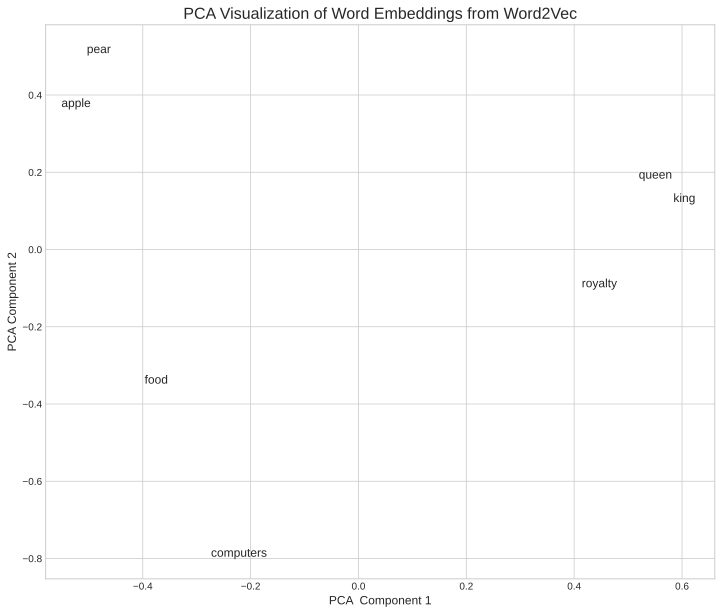

In [19]:
#  1. A set of tokens
words = ["king", "queen", "royalty", "food", "apple", "pear", "computers"]
word_embeddings, words = get_word2vec_embedding(words)

# # 4. Apply PCA to reduce dimensionality
# `n_components=2` reduces the n-dimensional vector to 2 dimensions i.e 2 columns
#  but still preserves the local relationships.
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(word_embeddings)

# 5. Visualize the 2D embeddings
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0)

# Add annotations (the words) to each point
for i, txt in enumerate(words):
    ax.annotate(txt, (X_2d[i, 0], X_2d[i, 1]),
                ha='center',
                va='center',
                fontsize=12,
                fontweight='medium')

plt.title('PCA Visualization of Word Embeddings from Word2Vec', fontsize=16)
plt.xlabel('PCA  Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.grid(True)
plt.show()

PCA image above tells you two things about embeddings:
1. Semantic similarity = geometric proximity. Words with similar meanings or usage contexts end up near one another.

2. Linear analogies. Though not shown here, vector offsets like king -
man
 ≈
queen -
woman.

 - 👉 **Exercise:** Explore this property on your own by computing similar vector offsets using the embedding model.

## ║ Positional Encodings: Why Order Matters [<font color='orange'>Beginner</font>]
<!-- (10 mins)-->


**Why positional embeddings?**  
- Token embeddings alone are permutation‐invariant, meaning that they don't know which token came first.  
- Word order is crucial for meaning (“I am happy” ≠ “ am I happy”).

**How positional embeddings work:**  
1. **Fixed (sinusoidal) encodings**  
   - Precomputed functions of position (sines and cosines at different frequencies).  
   - No extra parameters; supports arbitrary sequence lengths.  
2. **Learned positional embeddings**  
   - A trainable lookup table of shape `(max_seq_len × d_model)`.  
   - Each position index has its own embedding vector learned during training.


**Combining token + position:**  
```text
  final_embedding[i] = token_embedding[i] + pos_embedding[i]

##### **Sine and cosine functions: A simple way to add postion information**

To meet the desirable properties discussed above, the authors of [*Attention is All You Need*](https://arxiv.org/pdf/1706.03762)  propose a simple technique for **positional encoding**. This method injects information about token order into embeddings by applying a combination of sine and cosine functions at varying frequencies.

The position encoding for a given position `pos`, at embedding dimension index `i`, with total embedding size `d_model`, is defined as:

$$
PE_{\text{pos}, i} =
\begin{cases}
\sin\left(\frac{\text{pos}}{10000^{i / d_{\text{model}}}}\right), & \text{if } i \bmod 2 = 0 \\
\cos\left(\frac{\text{pos}}{10000^{(i - 1) / d_{\text{model}}}}\right), & \text{if } i \bmod 2 = 1
\end{cases}
$$

Assuming a model with embedding size \( $d_{\text{model}} = 8$ \), the positional encoding vector for position `pos` becomes:

$$
PE_{\text{pos}} =
\begin{bmatrix}
\sin\left(\frac{\text{pos}}{10000^{0 / 8}}\right) \\
\cos\left(\frac{\text{pos}}{10000^{0 / 8}}\right) \\
\sin\left(\frac{\text{pos}}{10000^{2 / 8}}\right) \\
\cos\left(\frac{\text{pos}}{10000^{2 / 8}}\right) \\
\sin\left(\frac{\text{pos}}{10000^{4 / 8}}\right) \\
\cos\left(\frac{\text{pos}}{10000^{4 / 8}}\right) \\
\sin\left(\frac{\text{pos}}{10000^{6 / 8}}\right) \\
\cos\left(\frac{\text{pos}}{10000^{6 / 8}}\right)
\end{bmatrix}
$$

> **Note:** Even indices use sine, and odd indices use cosine. The division by powers of 10000 ensures that each dimension encodes a different frequency.



To understand why these encodings work in practice, let's create a function to visualize them and play around with the `token_sequence_length` and the `token_embedding` dimension.

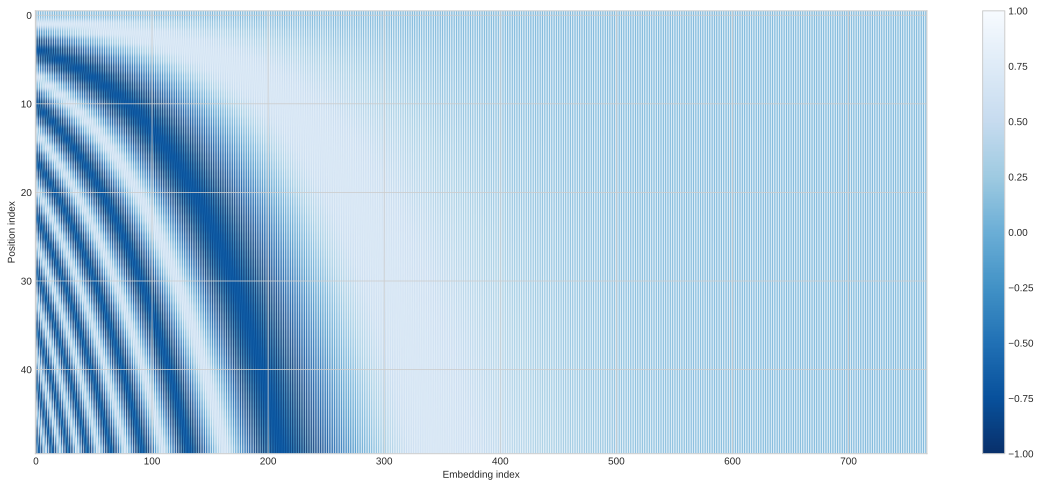

In [20]:
def return_frequency_pe_matrix(token_sequence_length, token_embedding):

  assert token_embedding % 2 == 0, "token_embedding should be divisible by two"

  P = jnp.zeros((token_sequence_length, token_embedding))
  positions = jnp.arange(0, token_sequence_length)[:, jnp.newaxis]

  i = jnp.arange(0, token_embedding, 2)
  frequency_steps = jnp.exp(i * (-math.log(10000.0) / token_embedding))
  frequencies = positions * frequency_steps

  P = P.at[:, 0::2].set(jnp.sin(frequencies))
  P = P.at[:, 1::2].set(jnp.cos(frequencies))

  return P

token_sequence_length = 50 # @param {type: "number"}
token_embedding = 768  # @param {type: "number"}
P = return_frequency_pe_matrix(token_sequence_length, token_embedding)
plot_position_encodings(P, token_sequence_length, token_embedding)

Notice how every row in the graph, corresponding to a specific token position displays a distinct wave pattern across the embedding dimensions. This means each position has a fixed and unique encoding, which allows the model to distinguish tokens based on their position in the sequence. The encodings don’t change between runs; they’re entirely determined by the formula.


 🤔 **Group Activity**:

- <font color='orange'>Take a moment with your friend to explore why this specific pattern appears when `token_sequence_length` is set to 1000, and `token_embedding` is 768.</font>
- <font color='orange'>Experiment with smaller values for `token_sequence_length` and `token_embedding` to build a deeper understanding and enhance your discussion.</font>
- <font color='orange'>Curious about the constant 10000? Ask your friend why they think it's used in the functions above.</font>
- <font color='orange'>Now, try setting `token_sequence_length` to 50 and `token_embedding` to a much larger value, like 10000. What do you observe? Do we always need a large token embedding?</font>


As we've learnt above, embeddings map each token into a continuous vector space where semantic relationships are encoded as geometric proximity. Attention mechanisms then build directly on these embeddings by computing similarity scores between token vectors to decide how much each token should “attend” to every other token in the sequence. In other words, embeddings provide the raw features, and attention uses those features to dynamically weight and combine information across tokens.

Below you will write a function which implements dot-product attention. The goal is to compute a context vector, $c_t$, that summarizes the information in the hidden_states (H) relevant to the previous_state (q).

This is achieved in three steps:

- Calculate Attention Scores (S): Compute the dot product of the query vector q with all key vectors in H.  This will give us the pairwise similarity between the vectors. For simplicity, we shall treat each token's embedding as both a key and a query,  

- Calculate Attention Weights (α): Apply a softmax function to the scores to normalize them into a probability distribution.

- Calculate Context Vector ($c_t$): Compute the weighted sum of the value vectors (in this case, H) using the attention weights.

These steps are summarized by the following equations:

$$
\begin{align*}
S &= q \cdot H^T \\
\alpha &= \text{softmax}(S) \\
c_t &= \alpha \cdot H
\end{align*}
$$

Finally, we’ll visualize the resulting attention weights for a small set of example words.  

In [21]:
def dot_product_attention(hidden_states, previous_state):
    """
    Calculate the dot product between the hidden states and previous states.

    Args:
        hidden_states: A tensor with shape [T_hidden, dm]
        previous_state: A tensor with shape [T_previous, dm]
    """

    # Hint: To calculate the attention scores, think about how you can use the `previous_state` vector
    # and the `hidden_states` matrix. You want to find out how much each element in `previous_state`
    # should "pay attention" to each element in `hidden_states`. Remember that in matrix multiplication,
    # you can find the relationship between two sets of vectors by multiplying one by the transpose of the other.
    # Hint: Use `jnp.matmul` to perform the matrix multiplication between `previous_state` and the
    # transpose of `hidden_states` (`hidden_states.T`).
    scores = ...  # FINISH ME

    # Hint: Now that you have the scores, you need to convert them into probabilities.
    # A softmax function is typically used in attention mechanisms to turn raw scores into probabilities
    # that sum to 1. This will help in determining how much focus should be placed on each hidden state.
    # Hint: Use `jax.nn.softmax` to apply the softmax function to `scores`.
    w_n = ...  # FINISH ME

    # Multiply the weights by the hidden states to get the context vector
    # Hint: Use `jnp.matmul` again to multiply the attention weights `w_n` by `hidden_states`
    # to get the context vector.
    c_t = jnp.matmul(w_n, hidden_states)

    return w_n, c_t

In [22]:

# @title Run me to test your code

key = jax.random.PRNGKey(42)
x = jax.random.normal(key, [2, 2])

try:
  w_n, c_t = dot_product_attention(x, x)

  w_n_correct = jnp.array([[0.9567678, 0.04323225], [0.00121029, 0.99878967]])
  c_t_correct = jnp.array([[0.11144122, 0.95290256], [-1.5571996, -1.5321486]])
  assert jnp.allclose(w_n_correct, w_n), "w_n is not calculated correctly"
  assert jnp.allclose(c_t_correct, c_t), "c_t is not calculated correctly"

  print("It seems correct. Look at the answer below to compare methods.")
except:
  print("It looks like the function isn't fully implemented yet. Try modifying it.")

It looks like the function isn't fully implemented yet. Try modifying it.


In [23]:

# when changing these words, note that if the word is not in the original
# training corpus it will not be shown in the weight matrix plot.
# @title Answer to code task (Try not to peek until you've given it a good try!')
def dot_product_attention(hidden_states, previous_state):
    # Calculate the attention scores:
    # Multiply the previous state vector by the transpose of the hidden states matrix.
    # This gives us a matrix of scores that show how much attention each element in the previous state
    # should pay to each element in the hidden states.
    # The result is a matrix of shape [T, N], where:
    # T is the number of elements in the hidden states,
    # N is the number of elements in the previous state.
    scores = jnp.matmul(previous_state, hidden_states.T)

    # Apply the softmax function to the scores to convert them into probabilities.
    # This normalizes the scores so that they sum up to 1 for each element,
    # allowing us to interpret them as how much attention should be given to each hidden state.
    w_n = jax.nn.softmax(scores)

    # Calculate the context vector (c_t):
    # Multiply the attention weights (w_n) by the hidden states.
    # This combines the hidden states based on how much attention each one deserves,
    # resulting in a new vector that represents the weighted sum of the hidden states.
    # The resulting shape is [T, d], where:
    # T is the number of elements in the previous state,
    # d is the dimension of the hidden states.
    c_t = jnp.matmul(w_n, hidden_states)

    # Return the attention weights and the context vector.
    return w_n, c_t

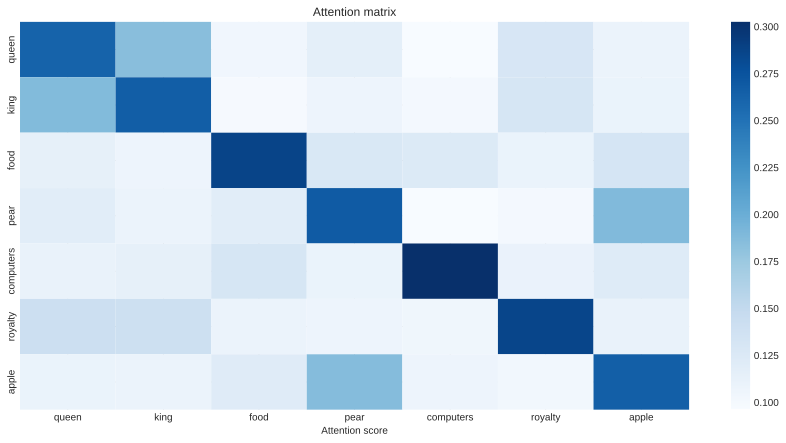

In [24]:
words = ["king", "queen", "royalty", "food", "apple", "pear", "computers"]
word_embeddings, words = get_word2vec_embedding(words)
weights, _ = dot_product_attention(word_embeddings, word_embeddings)
plot_attention_weight_matrix(weights, words, words)

Looking at the matrix, we can see which words have similar meanings. The "royal" group of words have higher attention scores with each other than the "food" words, which all attend to one another. We also see that "computers" have very low attention scores for all of them, which shows that they are neither very related to "royal" or "food" words.

Note: Dot product is only one of the ways to implement the scoring function for attention mechanisms, there is a more extensive list in [this](https://lilianweng.github.io/posts/2018-06-24-attention/#summary) blog post by Dr Lilian Weng.



## 🔍 Attention [<font color='green'>Intermediate</font>]

<!-- (25mins)-->

### Between Self Attention & Multi Head attention

Self-attention and multi-head attention (MHA) are fundamental components of the transformer architecture. In this section, we'll thoroughly explain the intuition behind these concepts and their implementation. Later, in the Transformers section, you'll learn how these attention mechanisms are used to create a sequence-to-sequence model that relies entirely on attention.

As we move forward, we'll represent sentences by breaking them down into individual words and encoding each word using the word2vec model discussed earlier. In the Transformers section, we'll explore in more detail how input sequences are transformed into a series of vectors.

In [25]:
def embed_sentence(sentence):
    """
    Embed a sentence using word2vec; for example use cases only.
    """
    # clean sentence (not necessary if using a proper LLM tokenizer)
    sentence = remove_punctuation(sentence)

    # extract individual words (word tokenization)
    words = sentence.split()

    # get the word2vec embedding for each word in the sentence
    word_vector_sequence, words = get_word2vec_embedding(words)

    # return with extra dimension (useful for creating batches later)
    return jnp.expand_dims(word_vector_sequence, axis=0), words

### Self Attention

A simple question about this sentence is what the word "it" refers to? Even though it might look simple, it can be tough for an algorithm to learn this. This is where self-attention comes in, as it can learn an attention matrix for the word "it" where a large weight is assigned to the word "animal".

Self-attention also allows the model to learn how to interpret words with the same embeddings, such as apple, which can be a company or food, depending on the context. This is very similar to the hidden state found within an Recurrent Neural Network (RNN) (this is another type of NN used to process text data), but this process, as you will see, allows the model to attend over the entire sequence in parallel, allowing longer sequences to be utilised.

Self-attention consists of three concepts:

* Queries, keys and values
* Scaled dot product attention
* Masks


$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$


<figure>
  <img src="https://drive.google.com/uc?export=view&id=1VwPK-JVOe_NyY4QwKcaCxp4YGpxVIu1u" alt="Positional Encoding Vectors" width="800"/>
  <figcaption><em></em></figcaption>
</figure>

In [26]:
class SequenceToQKV(nn.Module):
  output_size: int

  @nn.compact
  def __call__(self, X):

    # define the method for weight initialisation
    initializer = nn.initializers.variance_scaling(scale=0.5, mode="fan_in", distribution="truncated_normal")

    # initialise three linear layers to do the QKV transformations.
    # note: this can also be one layer, how do you think you would do it?
    q_layer = nn.Dense(self.output_size, kernel_init=initializer)
    k_layer = nn.Dense(self.output_size, kernel_init=initializer)
    v_layer = nn.Dense(self.output_size, kernel_init=initializer)

    # transform and return the matrices
    Q = q_layer(X)
    K = k_layer(X)
    V = v_layer(X)

    return Q, K, V

But what's the query, Key and values?

🎯 Real-Life Analogy:
Imagine you're in a library, trying to find the most relevant facts for a question.

* You have a question in mind: that’s your query.

* Each book in the library has a title or description: that's its key.

* Inside each book is the actual content: that’s the value.

In self-attention, every word in a sentence plays all three roles:

* It creates a query: "What am I looking for?"

* It presents a key: "What information do I contain?"

* It offers a value: "Here’s what I can contribute."


In general:
* Self-Attention is permutation invariant.

* Self-Attention requires no parameters. Up to now the interaction between words
has been driven by their embedding and the positional encodings.

* We expect values along the diagonal (of the Matrix) to be the highest.

* If we don’t want some positions to interact, we can always set their values to –∞

Conclusion: Self-Attention allows the model to relate words to each other.


Now that we have our `query`, `key` and `value` matrices, it is time to calculate the attention matrix. Remember, in all attention mechanisms; we must first find a score for each vector in the sequence and then use these scores to create a new context vector. In self-attention scoring is done using scaled dot product attention, and then the normalised scores are used as weights to sum the value vectors and create the context vector.

$\operatorname{Attention}(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right) V$

where the attention scores are calculated by $\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}\right)$ and the scores are then multiplied by $V$ to get the context vector.


What happens here is similar to what we did in the dot product attention in the previous section, just applying the mechanism to the sequence itself. For each element in the sequence, we calculate the attention weight matrix between $q_i$ and $K$. We then multiply $V$ by each weight and finally sum all weighted vectors $v_{weighted}$ together to form a new representation for $q_i$. By doing this, we are essentially drowning out irrelevant vectors and bringing up important vectors in the sequence when our focus is on $q_1$.

$QK^\top$ is scaled by the square root of the dimension of the vectors, $\sqrt{d_k}$, to ensure more stable gradients during training.

In [27]:
def scaled_dot_product_attention(query, key, value):
    """
    Formula to return scaled dot product attention given QKV matrices
    """
    d_k = key.shape[-1]

    # get the raw scores (logits) from dot producting the queries and keys
    logits = jnp.matmul(query, jnp.swapaxes(key, -2, -1))

    # scale the raw scores and apply the softmax function to get the attention scores/weights
    scaled_logits = logits / jnp.sqrt(d_k)
    attention_weights = jax.nn.softmax(scaled_logits, axis=-1)

    # multiply the weights by the value matrix to get the output
    output = jnp.matmul(attention_weights, value)

    return output, attention_weights

Let's now see scaled dot product attention in action. We will take a sentence, embed each word using word2vec, and see what the final self-attention weights look like.

We will not use the linear projection layers we would need to train these. Instead, we are going to make things simple and use $X=Q=V=K$.

(6, 6) 6


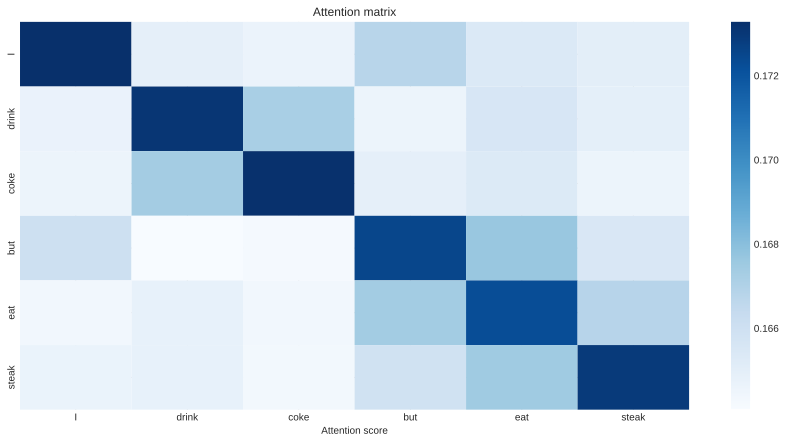

In [28]:
# define a sentence
sentence = "I drink coke, but eat steak"

# embed and create QKV matrices
word_embeddings, words = embed_sentence(sentence)
Q = K = V = word_embeddings

# calculate weights and plot
outputs, attention_weights = scaled_dot_product_attention(Q, K, V)

# plot the words and the attention weights between them
words = remove_punctuation(sentence).split()
print(attention_weights[0].shape, len(words))
plot_attention_weight_matrix(attention_weights[0], words, words)

Keep in mind that we have not trained our attention matrix yet. However, we can see that by utilising the word2vec vectors as our sequence, we can see how scaled dot product attention already is capable of attending to "eat" when "steak" is our query and that the query "drink" attends more to "coke" and "eat".

More resources:

[Attention with Q,K,V](https://www.youtube.com/watch?v=k-5QMalS8bQ&list=PLmZlBIcArwhPHmHzyM_cZJQ8_v5paQJTV&index=7)

## The beast with many heads: Multi-Head attention


We talked about self attention mechanisim in the last section, How does the multi-head attention relate to the self-attention mechanism (scaled-dot product attention)?

<figure>
  <img src="https://drive.google.com/uc?export=view&id=1e0C2tC29XylPRVfwXo_-NLzisQbLIdxl" alt="Positional Encoding Vectors" width="800"/>
  <figcaption><em></em></figcaption>
</figure>

Multi-head self-attention is a variant of self-attention used in the Transformer model. It involves running multiple sets of attention computations in parallel, each focusing on different relationships and aspects of the input sequence.
rather than only computing the attention once, the MHA mechanism runs through the scaled dot-product attention multiple times in parallel. According to the paper, Attention is All You Need, "multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. With a single attention head, averaging inhibits this."

Multi-head attention can be viewed as a similar strategy to stacking convolution kernels in a Convolutional Neural Network (CNN) layer that is used to process images. This allows the kernels to focus on and learn different features and rules, which is why multiple heads of attention also work.

<figure>
  <img src="https://drive.google.com/uc?export=view&id=1ulHkifKMzFSHl7-pJnUpc5VP-H2FssED" alt="Positional Encoding Vectors" width="1300" height="700"/>
  <figcaption><em></em></figcaption>
</figure>

Or more precisely something like this: A stack of scaled dot product attention


<figure>
  <img src="https://drive.google.com/uc?export=view&id=1lfMZAgs6bR5_0blSB95SAPuX1TNpNaCC" alt="Positional Encoding Vectors" width="500"/>
  <figcaption><em></em></figcaption>
</figure>

### 📘 Further Reading: Masked Attention

Masked attention is an essential concept in Transformer models, especially for sequence generation.  
👉 **Task:** Please read about masked attention on your own and understand why it is used in Transformer decoders (e.g., GPT models) and how it prevents look-ahead.

### 🧵 Key Takeaway

* **Be aware of how LLMs represent your language**, especially if you're using commercial APIs. The way your text is tokenized directly affects cost.
* If you're training your own LLM, **pay close attention to tokenization**. You might want to **adapt the tokenizer to your language** to reduce token count and make representation more compact and efficient.
* Recent work by **Cohere** explores building a [**universal tokenizer**](https://arxiv.org/pdf/2506.10766) that works well across multiple languages. This kind of research is trying to level the playing field.
* Also check out:

  * 📄 *[Do All Languages Cost the Same? Tokenization in the Era of Commercial Language Models](https://aclanthology.org/2023.emnlp-main.614.pdf)*
  * 📄 *[Language Model Tokenizers Introduce Unfairness Between Languages](https://arxiv.org/pdf/2305.154255)*

These studies highlighted early on that tokenizers introduced **structural unfairness**, especially for low-resource languages. Because of this, several commercial LLM providers have since started training **more representative tokenizers** to reduce token cost disparities across languages.

Bottom line: **Tokenization isn't just a technical detail, it's a language access issue.**

**🎛️ Interactive Enhancement:** The sliders and controls in this notebook let you see these effects in real-time!

# **Conclusion**
**Summary:**

You've now mastered the essentials of how a Large Language Model (LLM) works, from the fundamentals of attention mechanisms to interactive parameter control! These powerful tools have the potential to transform a wide range of tasks. However, like any deep learning model, their magic lies in applying them to the right problems with the right data.

Ready to take your skills to the next level? Dive into fine-tuning your own LLMs and unleash even more potential!

The world of LLMs is yours to explore—go ahead and create something amazing! 🌟🚀

**References:** for further references check the links referenced throughout
specific sections of this colab.

* [Attention is all you need paper](https://arxiv.org/abs/1706.03762)
* [What are Transformer Models and how do they work?](https://www.youtube.com/watch?v=qaWMOYf4ri8)
* [Keys, Queries, and Values: The celestial mechanics of attention](https://www.youtube.com/watch?v=RFdb2rKAqFw)
* [Additional videos on transformers](https://www.youtube.com/playlist?list=PLmZlBIcArwhOPR2s-FIR7WoqNaBML233s)
* [LLMs for Everyone DLI2023](https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/large_language_models.ipynb)
* [Foundations of LLM DLI2024](https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Foundations_of_LLMs/foundations_of_llms_practical.ipynb)